Imported all the necessary libraries and built_in functions

In [2]:
%pip install xgboost

  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
%pip install seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sklearn as ssk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


Loading "LOAN DATASET" here

In [2]:
df = pd.read_csv('loan_data.csv')

First 5 rows of data is shown as sample

In [6]:
df.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
42462,29.0,female,High School,22527.0,4,RENT,5379.0,MEDICAL,13.01,0.24,9.0,639,No,1
27500,30.0,male,Bachelor,173905.0,8,MORTGAGE,35000.0,PERSONAL,12.68,0.20,8.0,691,No,0
25479,31.0,female,Bachelor,103011.0,9,MORTGAGE,4500.0,PERSONAL,6.54,0.04,6.0,689,Yes,0
7051,21.0,male,Bachelor,62215.0,0,MORTGAGE,6000.0,PERSONAL,7.88,0.10,2.0,593,Yes,0
10889,26.0,female,Associate,85195.0,3,MORTGAGE,2500.0,DEBTCONSOLIDATION,10.99,0.03,3.0,638,No,0


df.head() command is used to view the structure of table[like how many col's here etc], by default it shows first 5 rows of data.

In [8]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')
Numerical columns: Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


using train_test_split function,
I choosed X[independent variable] and y[dependent variable],
splitted data into 80[for training] 20[testing] ratio

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop("loan_status", axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

Viewing shape of X_train , X_val, X_test   


In [4]:
# Print the shapes to confirm the splits
print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}\n")

print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}\n")

print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}\n")


Original X shape: (45000, 13)
Original y shape: (45000,)

X_train shape : (36000, 13)
y_train shape : (36000,)

X_test shape : (9000, 13)
y_test shape : (9000,)



Preprocessing Pipeline

In [5]:
numerical_columns = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
ordinal_columns = ['person_education']
categorical_columns = ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
         transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('ord', OrdinalEncoder(categories=[['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]), ordinal_columns),  # Encode education
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical features
    ]
)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test) # Transform the test set

# Print transformed data shapes
print("\nTransformed Data Shapes:")
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)


Transformed Data Shapes:
X_train_transformed shape: (36000, 23)
X_test_transformed shape: (9000, 23)


# Logistic Regression

In [13]:
print("\n*** Logistic Regression ***")

# Combine preprocessor and model into a pipeline for Logistic Regression
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=2))
])

# Fit the pipeline on the training data
pipeline_lr.fit(X_train, y_train)

# Evaluate the pipeline on Training and Test sets
train_score_lr = pipeline_lr.score(X_train, y_train)
test_score_lr = pipeline_lr.score(X_test, y_test)

print(f"\nTraining Data Accuracy of LR Model: {train_score_lr:.2f}")
print(f"Testing Data Accuracy LR Model: {test_score_lr:.2f}")

# Generate and print classification reports for Test sets
y_pred_test_lr = pipeline_lr.predict(X_test)
print("\nClassification Report for LRM on Testing data:\n", classification_report(y_test, y_pred_test_lr))


*** Logistic Regression ***

Training Data Accuracy of LR Model: 0.90
Testing Data Accuracy LR Model: 0.90

Classification Report for LRM on Testing data:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6984
           1       0.78      0.75      0.77      2016

    accuracy                           0.90      9000
   macro avg       0.86      0.84      0.85      9000
weighted avg       0.90      0.90      0.90      9000



Confusion Matrix


--- Generating Confusion Matrix for Logistic Regression (Test Data) ---


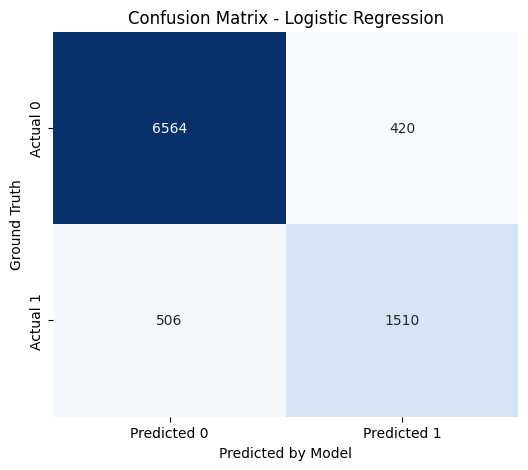

In [ ]:
# --- Generate Confusion Matrix ---
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, RocCurveDisplay

print("\n---  Confusion Matrix for Logistic Regression ---")
plt.figure(figsize=(6, 5))
y_pred_lr_cm = pipeline_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr_cm)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted by Model')
plt.ylabel('Ground Truth')
plt.show()

ROC Curve


  ROC Curve  


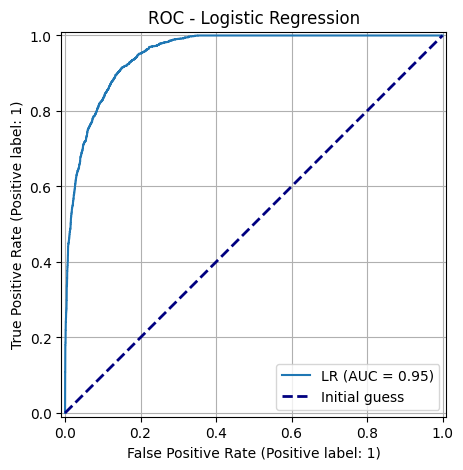

In [22]:
# Alternatively, using RocCurveDisplay
print("\n  ROC Curve  ")
fig, ax = plt.subplots(figsize=(6, 5))
roc_display = RocCurveDisplay.from_estimator(pipeline_lr, X_test, y_test, ax=ax, name='LR')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Initial guess')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Decision Tree Model 

In [ ]:
# --- Decision Tree Classifier ---
print("\n*** Decision Tree Classifier  ***")
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42)) # Using random_state for reproducibility
])

# Fit the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Evaluate the pipeline on Training and Test sets
train_score_dt = pipeline_dt.score(X_train, y_train)
test_score_dt = pipeline_dt.score(X_test, y_test)

print(f"\nTraining Data Accuracy : {train_score_dt:.2f}")
print(f"Testing Data Accuracy : {test_score_dt:.2f}")

# Generate and print classification reports for Test sets

y_pred_test_dt = pipeline_dt.predict(X_test)
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_test_dt))




*** Decision Tree Classifier  ***

Training Data Accuracy : 1.00
Testing Data Accuracy : 0.91

Classification Report for Decision Tree on Testing data:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      6984
           1       0.80      0.79      0.80      2016

    accuracy                           0.91      9000
   macro avg       0.87      0.87      0.87      9000
weighted avg       0.91      0.91      0.91      9000



Confusion Matrix for DT

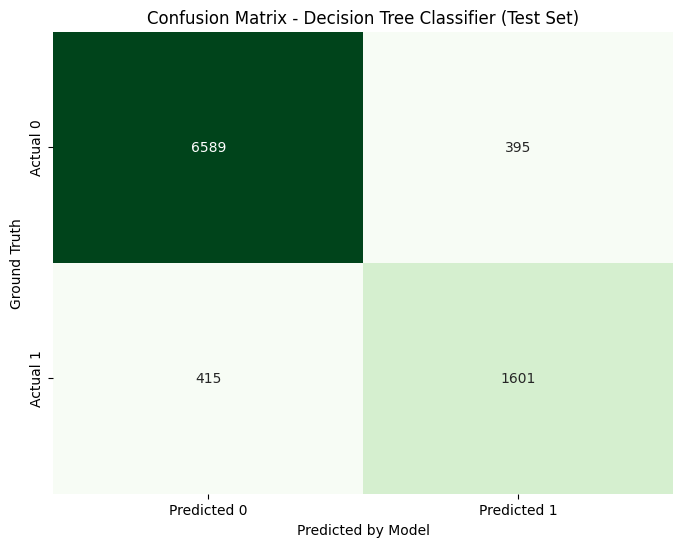

In [ ]:
# --- Generate Confusion Matrix for Decision Tree ---
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_pred_test_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted by Model')
plt.ylabel('Ground Truth')
plt.show()

<Figure size 800x600 with 0 Axes>

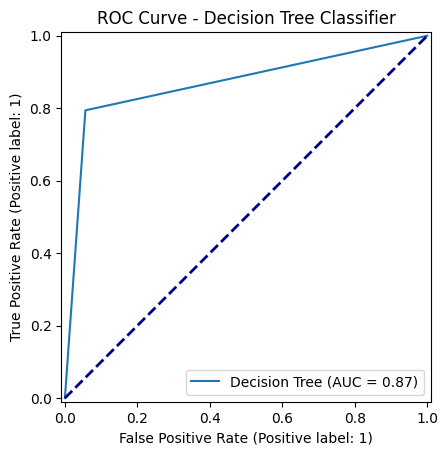

In [28]:
# --- Generate ROC Curve for Decision Tree (Modern Scikit-learn Approach) ---
plt.figure(figsize=(8, 6))
display = RocCurveDisplay.from_estimator(pipeline_dt, X_test, y_test, name='Decision Tree')
plt.title('ROC Curve - Decision Tree Classifier')
# Add the random classifier line for comparison
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

# Random Forest Classifier

In [ ]:
# --- Random Forest Classifier ---
print("\n*** Random Forest Classifier ***")
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)) # Using random_state for reproducibility
])

# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

# Evaluate  pipeline on Training and Test sets
train_score_rf = pipeline_rf.score(X_train, y_train)
test_score_rf = pipeline_rf.score(X_test, y_test)

print(f"\nTraining Data Accuracy : {train_score_rf:.2f}")
print(f"Testing Data Accuracy : {test_score_rf:.2f}")

#  classification report

y_pred_test_rf = pipeline_rf.predict(X_test)
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_test_rf))


*** Random Forest Classifier ***

Training Data Accuracy : 1.00
Testing Data Accuracy : 0.93

Classification Report for Random Forest on Testing data:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6984
           1       0.90      0.76      0.82      2016

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



Confusion Matrix for Random Forest

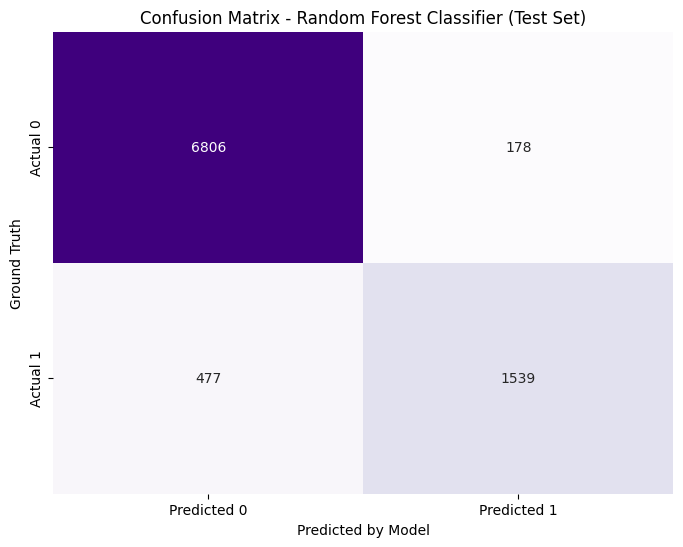

In [30]:
# --- Generate Confusion Matrix for Random Forest ---
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest Classifier (Test Set)')
plt.xlabel('Predicted by Model')
plt.ylabel('Ground Truth')
plt.show()

ROC Curve for Random Forest

<Figure size 800x600 with 0 Axes>

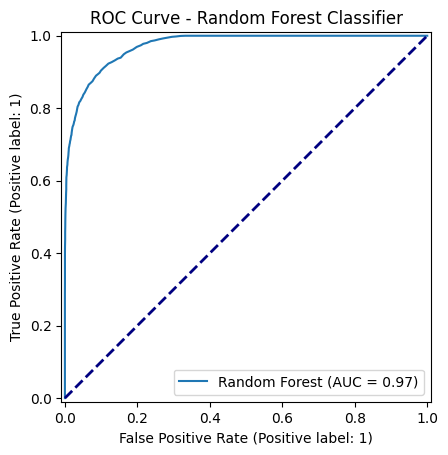

In [31]:
# --- Generate ROC Curve for Random Forest (Modern Scikit-learn Approach) ---
plt.figure(figsize=(8, 6))
display = RocCurveDisplay.from_estimator(pipeline_rf, X_test, y_test, name='Random Forest')
plt.title('ROC Curve - Random Forest Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random classifier line
plt.show()

# XG BOOST

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

model = xgb.XGBClassifier(
    n_estimators=100,      # Number of boosting rounds
    max_depth=6,           # Depth of trees (prevents overfitting)
    learning_rate=0.1,     # Step size shrinkage
    objective='binary:logistic', 
    random_state=42,
    label_encoder=False,
    enable_categorical=True  # Enable cat feature support
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)
y_probs = model.predict_proba(X_test_transformed)[:, 1] # Prob for AUC score

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.2f}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred))

e:\E\University\ML\Project-Loan Dataset\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:57:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.93
ROC-AUC Score: 0.98

Detailed Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6984
           1       0.90      0.77      0.83      2016

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



Confusion Matrix for XGBoost

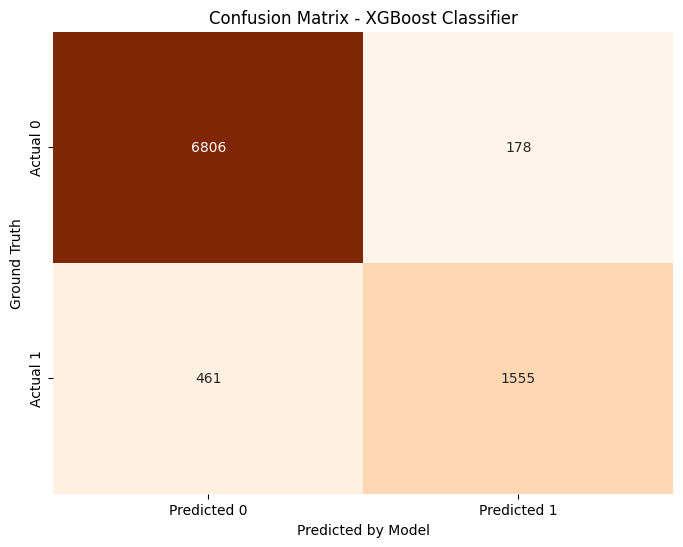

In [7]:
# --- Generate Confusion Matrix for XGBoost ---
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted by Model')
plt.ylabel('Ground Truth')
plt.show()

ROC Curve for XGBoost

<Figure size 800x600 with 0 Axes>

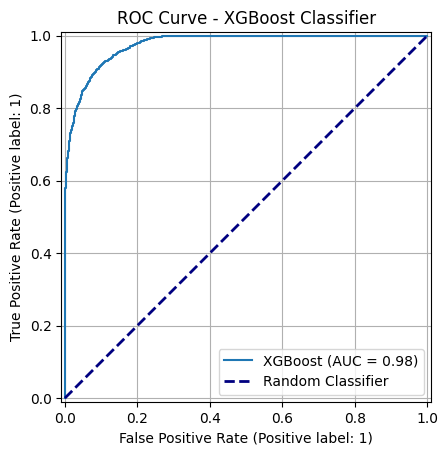

In [8]:
# --- Generate ROC Curve for XGBoost ---
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8, 6))
display = RocCurveDisplay.from_estimator(model, X_test_transformed, y_test, name='XGBoost')
plt.title('ROC Curve - XGBoost Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Save Model and Preprocessor for Deployment

In [ ]:
import joblib
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])
joblib.dump(full_pipeline, 'loan_model_pipeline.pkl')

['loan_model_pipeline.pkl']

Saved both preprocessor and model together to avoid conflict in UI and code optimization